In [619]:
import oisin.wfc as wfc
import networkx as nx
import matplotlib as plt

In [671]:
%matplotlib inline
gr = nx.balanced_tree(2, 4) # 6)
# gr = nx.circulant_graph(31,[0,2,5]) # pair with draw_circular
# gr = nx.gnc_graph(20)

# nx.draw(gr)
# gr.nodes # verify that node indexes are single integers

In [672]:
# neighbors of each node (contrast directed vs undirected graphs)
# [[nb for nb in gr.neighbors(i)] for i in range(len(gr.nodes))]

# degree of each node (but what is their betweenness?)
''.join([str(len([nb for nb in gr.neighbors(i)])) for i in range(len(gr.nodes))])

# trivial for graphs without cycles (due to directionality)
# nx.betweenness_centrality(gr)

'2333333333333331111111111111111'

In [673]:
class Collapser(wfc.Collapser):
    def __init__(self, nodes = range(len(gr.nodes))):
        states = set(list('ABCDEF'))
        wfc.Collapser.__init__(self, nodes, states)

    def consistent(self, node, nb, s):
        """Get a set of valid states for node, given nb == s"""
        
        return {'A': self.states - set('A'),
                'B': self.states - set('B'),
                'C': self.states - set('C'),
                'D': set(['B','C']),
                'E': set(['C','D']),
                'F': set(['A'])}[s]
        # return self.states - set(s) # produce an n-coloring

    def neighbours(self, node):
        """Get a list of nodes which can be directly affected by node"""
        # ret = [(node+1) % 26, (node+2) % 26] # implicit network
        return [nb for nb in gr.neighbors(node) if nb is not node]

    def restrict(self, node):
        """Get the set of possible states for a node (or None for any)"""
        return None # set('I') if node == 0 else None

In [681]:
cf = Collapser()
while not cf.resolved():
    cf.step()
    
stops = [{'A': .1, 'B': .2, 'C': .4, 'D': .6,
          'E': .8, 'F': .9, 'G': 1}[s]
      for s, in cf.valid.values()]
cm = [plt.cm.viridis(x) for x in stops]

''.join([s for s, in cf.valid.values()])

'AFBAADDFCBBCBBCAAEDCCCABAACDDBB'

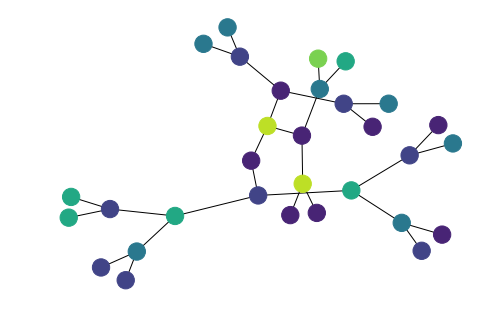

In [682]:
nx.draw(gr, node_color = cm) #, with_labels = True)